# manipulating time series data in python
indexing and resampling time series, converting to_datetime
basic time series calculations shift(),diff(),mul(),div()
frequency resampling to monthly, yearly,upsampling(bfill,ffill),reindex(),upsamping with resample(),
.add_suffix('_fill'), interpolate(),pd.concat([series_1, series_2), axis=1)
resample('M').median(), moving average,expanding windows (average up to date),
cumsum(), expanding().sum(), running return, correlation, heat map of correlation.




### Basic Building Block: pd.Timestamp

In [2]:
import pandas as pd
from datetime import datetime #to manually create dates
time_stamp=pd.Timestamp(datetime(2017,1,1))
pd.Timestamp('2017-01-01') == time_stamp
time_stamp

Timestamp('2017-01-01 00:00:00')

In [3]:
time_stamp.year

2017

In [4]:
time_stamp.weekday_name

C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


'Sunday'

### pd.Period and freq


In [6]:
period = pd.Period('2017-01')
period

Period('2017-01', 'M')

In [7]:
period.asfreq('D')

Period('2017-01-31', 'D')

In [8]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [9]:
period + 2

Period('2017-03', 'M')

In [10]:
pd.Timestamp('2017-01-31','M') + 1

Timestamp('2017-02-28 00:00:00', freq='M')

### Sequences of Dates and Times

In [11]:
index = pd.date_range(start='2017-1-1', periods=12, freq='M')
#pd.range: start, end, periods, freq
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [12]:
index[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [13]:
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')

### Create a Time Series: pd.DateTimeIndex

In [14]:
pd.DataFrame({'data':index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
data    12 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 176.0 bytes


In [20]:
import numpy as np
data = np.random.random(size=(12,2))
pd.DataFrame(data=data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
0    12 non-null float64
1    12 non-null float64
dtypes: float64(2)
memory usage: 288.0 bytes


### Frequency Aliases and Time Info
Aliases
Hour - H
Day - D
Week - W
Month - M
Quarter -Q
Year - A

Also possible to access these pd.Timestamp() attributes:
.second, .minute, .hour, .day, .month, .quarter, .year, .weekday, .dayofweek, .weekofyear, .dayofyear

## Indexing and Resampling Time Series
Basic Time Series transformations include: 
Parsing string dates and convert to datetime64
Selecting and slicing for specific subperiods
Setting and changing DateTimeIndex frequency
Upsampling vs Downsampling

### Getting GOOG stock prices

In [23]:
google=pd.read_csv('google.csv')
google.info()
google.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
date     1094 non-null object
close    756 non-null float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


,date,close
0,02-01-14,556.00
1,03-01-14,551.95
2,04-01-14,NaN
3,05-01-14,NaN
4,06-01-14,558.10


### Convering string dates to datetime64

In [25]:
google.date=pd.to_datetime(google.date)
google.info()
google.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
date     1094 non-null datetime64[ns]
close    756 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


,date,close
0,2014-02-01,556.00
1,2014-03-01,551.95
2,2014-04-01,NaN


In [26]:
google.set_index('date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-02-01 to 2016-12-30
Data columns (total 1 columns):
close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


### Plotting the google stock time series

TypeError: 'module' object is not callable

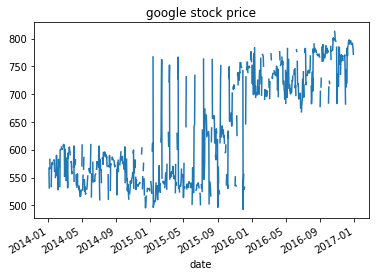

In [32]:
import matplotlib as plt
google.close.plot(title='google stock price')
plt.tight_layout()
plt.show()

### Partial string Indexing

In [33]:
google['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [34]:
google['2015-3':'2016-2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-12
Data columns (total 1 columns):
close    251 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [35]:
google.loc['2016-6-1','close']  #use full date with .loc[]

date
2016-06-01    743.62
Name: close, dtype: float64

### .asfreq():SetFrequency

In [36]:
google.asfreq('D').info() #set calendar day frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1064 entries, 2014-02-01 to 2016-12-30
Freq: D
Data columns (total 1 columns):
close    736 non-null float64
dtypes: float64(1)
memory usage: 16.6 KB


In [37]:
google.asfreq('D').head()   #upsampling, higher frequency
#implies new dates=> missing data

,close
date,
2014-02-01,556.00
2014-02-02,NaN
2014-02-03,NaN
2014-02-04,566.98
2014-02-05,527.93


### .asfreq():Reset Frequency

In [38]:
google=google.asfreq('B')  #change to calendar day frequency
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 760 entries, 2014-02-03 to 2016-12-30
Freq: B
Data columns (total 1 columns):
close    661 non-null float64
dtypes: float64(1)
memory usage: 11.9 KB


In [39]:
google[google.close.isnull()]  #select missing price - close in table

,close
date,
2014-02-03,NaN
2014-02-11,NaN
2014-02-17,NaN
2014-03-05,NaN
2014-04-01,NaN
2014-04-07,NaN
2014-04-10,NaN
2014-04-18,NaN
2014-05-01,NaN


## Lags changes and return for stock price series

### Basic Time Series Calculations

typical manipilations: shift of lag values back or forward in time, get the difference in value for a given time period,
compute the percent change over any number of periods

#### pandas build-inn methods rely on pd.DateTimeIndex

In [40]:
google = pd.read_csv('google.csv', parse_dates=['date'], index_col='date')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-02-01 to 2016-12-30
Data columns (total 1 columns):
close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


In [41]:
google.head()

,close
date,
2014-02-01,556.00
2014-03-01,551.95
2014-04-01,NaN
2014-05-01,NaN
2014-06-01,558.10


###   .shift()   :   Moving data between past and future

In [43]:
google['shifted'] = google.close.shift()  #default periods=1
google.head(3)

,close,shifted
date,,
2014-02-01,556.00,NaN
2014-03-01,551.95,556.00
2014-04-01,NaN,551.95


In [44]:
google['lagged'] = google.close.shift(periods=-1)
google.head(3)

,close,shifted,lagged
date,,,
2014-02-01,556.00,NaN,551.95
2014-03-01,551.95,556.00,NaN
2014-04-01,NaN,551.95,NaN


### Calculate one period percent change

In [46]:
google['change'] = google.close.div(google.shifted)  # xt  / xt-1
google.head(10)

,close,shifted,lagged,change
date,,,,
2014-02-01,556.00,NaN,551.95,NaN
2014-03-01,551.95,556.00,NaN,0.992716
2014-04-01,NaN,551.95,NaN,NaN
2014-05-01,NaN,NaN,558.10,NaN
2014-06-01,558.10,NaN,568.86,NaN
2014-07-01,568.86,558.10,570.04,1.019280
2014-08-01,570.04,568.86,564.55,1.002074
2014-09-01,564.55,570.04,564.52,0.990369
2014-10-01,564.52,564.55,NaN,0.999947


In [47]:
google['return'] = google.change.sub(1).mul(100)
google.head(10)

,close,shifted,lagged,change,return
date,,,,,
2014-02-01,556.00,NaN,551.95,NaN,NaN
2014-03-01,551.95,556.00,NaN,0.992716,-0.728417
2014-04-01,NaN,551.95,NaN,NaN,NaN
2014-05-01,NaN,NaN,558.10,NaN,NaN
2014-06-01,558.10,NaN,568.86,NaN,NaN
2014-07-01,568.86,558.10,570.04,1.019280,1.927970
2014-08-01,570.04,568.86,564.55,1.002074,0.207432
2014-09-01,564.55,570.04,564.52,0.990369,-0.963090
2014-10-01,564.52,564.55,NaN,0.999947,-0.005314


### .diff() and .pct_change(): build in time series change

In [49]:
google['diff']=google.close.diff()
google.head(8)

,close,shifted,lagged,change,return,diff
date,,,,,,
2014-02-01,556.00,NaN,551.95,NaN,NaN,NaN
2014-03-01,551.95,556.00,NaN,0.992716,-0.728417,-4.05
2014-04-01,NaN,551.95,NaN,NaN,NaN,NaN
2014-05-01,NaN,NaN,558.10,NaN,NaN,NaN
2014-06-01,558.10,NaN,568.86,NaN,NaN,NaN
2014-07-01,568.86,558.10,570.04,1.019280,1.927970,10.76
2014-08-01,570.04,568.86,564.55,1.002074,0.207432,1.18
2014-09-01,564.55,570.04,564.52,0.990369,-0.963090,-5.49


In [50]:
google['pct_change'] = google.close.pct_change().mul(100)
google.head(8)

,close,shifted,lagged,change,return,diff,pct_change
date,,,,,,,
2014-02-01,556.00,NaN,551.95,NaN,NaN,NaN,NaN
2014-03-01,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417
2014-04-01,NaN,551.95,NaN,NaN,NaN,NaN,0.000000
2014-05-01,NaN,NaN,558.10,NaN,NaN,NaN,0.000000
2014-06-01,558.10,NaN,568.86,NaN,NaN,NaN,1.114231
2014-07-01,568.86,558.10,570.04,1.019280,1.927970,10.76,1.927970
2014-08-01,570.04,568.86,564.55,1.002074,0.207432,1.18,0.207432
2014-09-01,564.55,570.04,564.52,0.990369,-0.963090,-5.49,-0.963090


In [51]:
### percent change for two periods, 3 trading days apart
google['return_3days'] = google.close.pct_change(3).mul(100)
google.head(8)

,close,shifted,lagged,change,return,diff,pct_change,return_3days
date,,,,,,,,
2014-02-01,556.00,NaN,551.95,NaN,NaN,NaN,NaN,NaN
2014-03-01,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417,NaN
2014-04-01,NaN,551.95,NaN,NaN,NaN,NaN,0.000000,NaN
2014-05-01,NaN,NaN,558.10,NaN,NaN,NaN,0.000000,-0.728417
2014-06-01,558.10,NaN,568.86,NaN,NaN,NaN,1.114231,1.114231
2014-07-01,568.86,558.10,570.04,1.019280,1.927970,10.76,1.927970,3.063683
2014-08-01,570.04,568.86,564.55,1.002074,0.207432,1.18,0.207432,3.277471
2014-09-01,564.55,570.04,564.52,0.990369,-0.963090,-5.49,-0.963090,1.155707


## Compare Time Series Growth Rates
### Comparing stock performance
simple solution: normalize price series to start at 100
divivide all prices by first in series, multiply by 100
(same starting point, all prices relative to starting point, difference to starting point in percentage points
#### Normalizing a single series

In [53]:
google=pd.read_csv('google.csv', parse_dates=['date'], index_col='date')
google.head(7)

,close
date,
2014-02-01,556.00
2014-03-01,551.95
2014-04-01,NaN
2014-05-01,NaN
2014-06-01,558.10
2014-07-01,568.86
2014-08-01,570.04


In [54]:
first_price=google.close.iloc[0]
first_price

556.0

In [56]:
first_price == google.loc['2014-02-01', 'close']

date
2014-02-01    True
Name: close, dtype: bool

### normalizing a single series

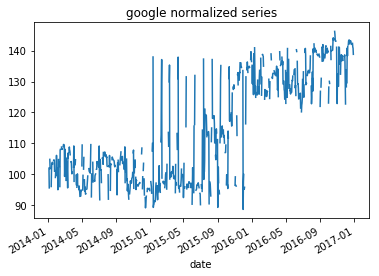

In [57]:
normalized=google.close.div(first_price).mul(100)
normalized.plot(title='google normalized series')

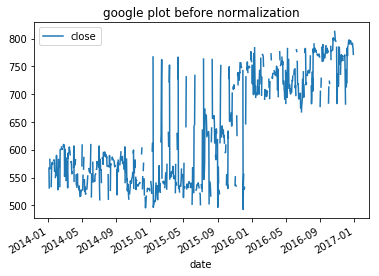

In [58]:
google.plot(title='google plot before normalization')  

### Normalizing multiple series

In [59]:
prices=pd.read_csv('stock_data.csv', parse_dates=['date'], index_col='date')
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-04-01 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB


In [60]:
prices.head(3)

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
date,,,,,,,,,,,,
2010-04-01,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-05-01,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-06-01,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85


In [61]:
prices.iloc[0]

AAPL     30.57
AMGN     57.72
AMZN    133.90
CPRT      4.55
EL       24.27
GS      173.08
ILMN     30.55
MA       25.68
PAA      27.00
RIO      56.03
TEF      28.55
UPS      58.18
Name: 2010-04-01 00:00:00, dtype: float64

In [62]:
# .div() automatic alignment of series index and data frame columns
normalized=prices.div(prices.iloc[0])
normalized.head(3)

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
date,,,,,,,,,,,,
2010-04-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-05-01,1.001963,0.991337,1.005900,1.000000,0.996292,1.017680,0.993453,0.997274,1.011111,1.015527,0.999299,1.001719
2010-06-01,0.985934,0.983888,0.987677,0.995604,0.999176,1.006818,1.054664,0.995327,1.010741,1.046582,0.988792,0.994328


### comparing with a benchmark

In [ ]:
index=pd.read_csv('benchmark.csv', parse_dates=['date'], index_col='date')

In [63]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-04-01 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB


In [64]:
prices=pd.concat([prices,index], axis=1).dropna()
prices.info()

TypeError: cannot concatenate object of type "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

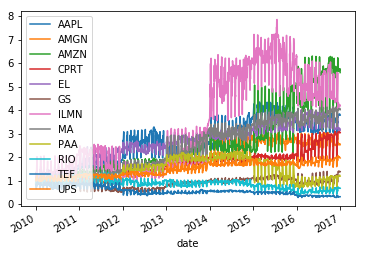

In [65]:
normalized.plot()

In [66]:
diff=normalized[tickers].sub(normalized['SP500'], axis=0)

NameError: name 'tickers' is not defined

### Changing The time series
#### Frequency : Resampling
DateTimeIndex: set and change freq using .asfreq()
but frequency convertion affect the data, upsampling fill or interpolate missing data
Downsampling : aggregate existing data


pandas API:
.asfreq(), .reindex()
.resample() + transformation method

In [2]:
import pandas as pd
#getting started quarterly data
dates=pd.date_range(start='2016', periods=4, freq='Q')
data=range(1,5)
quarterly=pd.Series(data=data, index=dates)
quarterly  #default year end quarters

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [3]:
#upsamplig quarter to a month
monthly=quarterly.asfreq('M')
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

In [4]:
monthly = monthly.to_frame('baseline')
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


### Upsampling Fill Methods

In [5]:
#bfill backfill, ffill forward fill
monthly['ffill'] =quarterly.asfreq('M', method='ffill')
monthly['bfill'] =quarterly.asfreq('M', method='bfill')
monthly['value'] =quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


### Add missing months: .reindex()

.reindex(): conform DataFrame to new index, same filling logic as .asfreq()

In [6]:
dates=pd.date_range(start='2016', periods=12, freq='M')
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

### Upsampling and interpolation with .resample()
<br>
.resample() similar to .groupby()<br>
groups data within resampling period and applies one or several methods to each group<br>
new date determined by offset - start, end, etc<br>
upsampling: fill from existing or interpolate values<br>
downsampling: apply aggregation to existing data<br>



In [14]:
#loading monthly unemploymnet rates
import pandas as pd

unrate = pd.read_csv('unrate.csv', parse_dates=True, index_col='DATE')
unrate.info()
unrate.head()



#reporting date: 1st day of month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 778 entries, 1948-01-01 to 2012-10-01
Data columns (total 1 columns):
VALUE    778 non-null float64
dtypes: float64(1)
memory usage: 12.2 KB


,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


#### Resampling Period and Frequency offsets
Resample creates new date for frequency offsets
Several alternatives to calendar month end

Calendar month end = M
calendar month start =MS
Business month end =BM
Business month start=BMS

#### Assign frequency with .resample()


In [15]:
unrate.asfreq('MS').info

unrate.resample('MS')  #creates resampler object
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())  
#.resample(): returns data only when calling another method
unrate.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


#### Interpolate from quarterly to monthly

In [55]:
sales = pd.read_csv('sales.csv', parse_dates=True, index_col='date')
sales.info()
sales.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2016-01-01 to 2018-10-01
Data columns (total 1 columns):
sales    12 non-null float64
dtypes: float64(1)
memory usage: 192.0 bytes


,sales
date,
2016-01-01,266.0
2016-04-01,119.3
2016-07-01,231.8
2016-10-01,122.9
2017-01-01,194.3


In [57]:
#forward fill (ffill) from quarterly to montly
sales_1=sales.resample('MS').ffill().add_suffix('_ffill')
sales_1.head()

,sales_ffill
date,
2016-01-01,266.0
2016-02-01,266.0
2016-03-01,266.0
2016-04-01,119.3
2016-05-01,119.3


In [58]:
#resample interpolate
sales_2=sales.resample('MS').interpolate().add_suffix('_inter')
sales_2.head()

,sales_inter
date,
2016-01-01,266.0
2016-02-01,217.1
2016-03-01,168.2
2016-04-01,119.3
2016-05-01,156.8


#### concatenating two data frames

In [60]:
sales_concat=pd.concat([sales_1, sales_2], axis=1)
sales_concat.head()

,sales_ffill,sales_inter
date,,
2016-01-01,266.0,266.0
2016-02-01,266.0,217.1
2016-03-01,266.0,168.2
2016-04-01,119.3,119.3
2016-05-01,119.3,156.8


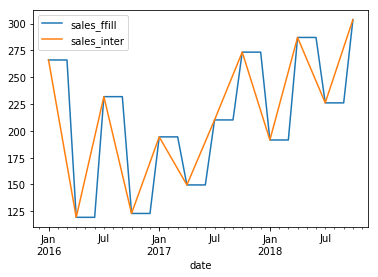

In [62]:
#plot interpolated result
pd.concat([sales_1, sales_2], axis=1).plot()

## Downsampling and aggregation

upsampling - quarter to month

downsampling - hour to day, day to month...


In [74]:
#air quality ozone levels
ozone=pd.read_csv('ozone.csv', parse_dates=True, index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB


In [66]:
ozone.tail(3)

,ozone
date,
2017-12-01,0.014849
2017-12-02,0.013210
2017-12-03,0.032729


In [67]:
ozone=ozone.resample('D').asfreq()
ozone.tail(5)

,ozone
date,
2017-11-29,NaN
2017-11-30,NaN
2017-12-01,0.014849
2017-12-02,0.013210
2017-12-03,0.032729


In [68]:
#creating monthly ozone data
ozone.resample('M').mean().head()
# .resample().mean() - monthly average assigned to end of calendar month

,ozone
date,
2000-01-31,0.013841
2000-02-29,0.016632
2000-03-31,0.017673
2000-04-30,0.019252
2000-05-31,0.022548


In [69]:
ozone.resample('M').median().head()

,ozone
date,
2000-01-31,0.012403
2000-02-29,0.015030
2000-03-31,0.017144
2000-04-30,0.020145
2000-05-31,0.022905


In [70]:
#creating montly ozone data
ozone.resample('M').agg(['mean','std']).head()

ozone          
                mean       std
date                          
2000-01-31  0.013841  0.007277
2000-02-29  0.016632  0.009988
2000-03-31  0.017673  0.007214
2000-04-30  0.019252  0.007354
2000-05-31  0.022548  0.007763

In [73]:
ozone=ozone.resample('M').mean()
ozone.head()

,ozone
date,
2016-01-31,0.020158
2016-02-29,0.021160
2016-03-31,0.028107
2016-04-30,0.031202
2016-05-31,0.030295


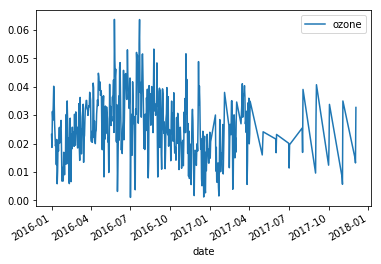

In [77]:
ozone=ozone.loc['2016':]
ozone.plot()

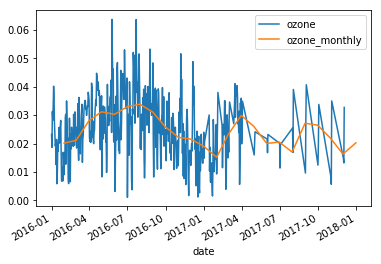

In [80]:
#plotting resampled ozone data
ozone=ozone.loc['2016':]
ax=ozone.plot()
monthy=ozone.resample('M').mean()
monthy.add_suffix('_monthly').plot(ax=ax)

### Resampling multiple time series

In [81]:
data=pd.read_csv('ozone.csv', parse_dates=True, index_col='date')
data=data.resample('D').asfreq()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6547 entries, 2000-01-01 to 2017-12-03
Freq: D
Data columns (total 1 columns):
ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 102.3 KB


,ozone
date,
2000-01-01,0.004032
2000-01-02,0.010583
2000-01-03,0.007418
2000-01-04,0.017631
2000-01-05,0.022628


In [83]:
data['new_column']=data['ozone']*1.05
data.head(3)

,ozone,new_column
date,,
2000-01-01,0.004032,0.004234
2000-01-02,0.010583,0.011112
2000-01-03,0.007418,0.007789


In [84]:
#resampling multiple columns
data=data.resample('BM').mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2000-01-31 to 2017-12-29
Freq: BM
Data columns (total 2 columns):
ozone         216 non-null float64
new_column    216 non-null float64
dtypes: float64(2)
memory usage: 5.1 KB


In [85]:
data.resample('M').first().head(4)

,ozone,new_column
date,,
2000-01-31,0.013841,0.014533
2000-02-29,0.016632,0.017463
2000-03-31,0.017673,0.018556
2000-04-30,0.018765,0.019703


In [86]:
data.resample('MS').first().head()

,ozone,new_column
date,,
2000-01-01,0.013841,0.014533
2000-02-01,0.016632,0.017463
2000-03-01,0.017673,0.018556
2000-04-01,0.018765,0.019703
2000-05-01,0.022752,0.023890


## Rolling Window with Pandas

### Window functins in pandas
Windows identify sub periods of your time series
Calculate metrics for sub periods inside the window
create new time series of metrics
two type of windows: rolling (same size, sliding), expanding (contains all prior values)

### Basics of Moving Averages
Moving averages are used and discussed quite commonly by technical analysts and traders alike. If you’ve never heard of a moving average, it is likely you have at least seen one in practice. A moving average can help an analyst filter noise and create a smooth curve from an otherwise noisy curve. It is important to note moving averages lag because they are based on historical data, not current price.

The Simple Moving Average formula is a very basic arithmetic mean over the number of periods.

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

#calculating a rolling average
data_sp500=pd.read_csv('SP500.csv', parse_dates=True)
data_sp500.info()
data_sp500.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 2 columns):
date_datta    2395 non-null object
SP500         2395 non-null float64
dtypes: float64(1), object(1)
memory usage: 37.5+ KB


,date_datta,SP500
0,29-06-07,1503.35
1,02-07-07,1519.43
2,03-07-07,1524.87


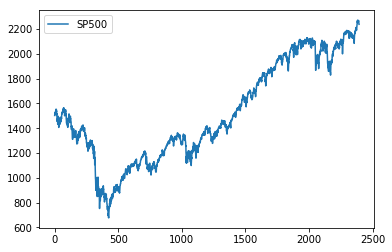

In [23]:
data_sp500.plot()

In [24]:
#calculating a rolling average
# # 30 business days min_periods choose value <30 to get results for first days
data_sp500.info()
#data.rolling(window=30).mean() #fixed observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 2 columns):
date_datta    2395 non-null object
SP500         2395 non-null float64
dtypes: float64(1), object(1)
memory usage: 37.5+ KB


In [30]:
mean_data_30=data_sp500.SP500.rolling(window=30).mean() #fixed observations
mean_data_360=data_sp500.SP500.rolling(window=360).mean() #fixed observations

In [31]:
data_sp500.head()

,date_datta,SP500
0,29-06-07,1503.35
1,02-07-07,1519.43
2,03-07-07,1524.87
3,05-07-07,1525.40
4,06-07-07,1530.44


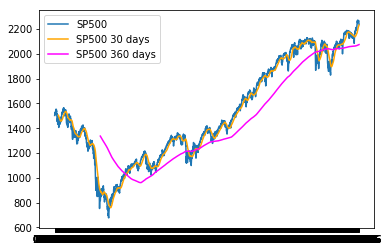

In [32]:
plt.plot(data_sp500.date_datta, data_sp500.SP500, label='SP500')
plt.plot(data_sp500.date_datta, mean_data_30, label='SP500 30 days', color='orange')
plt.plot(data_sp500.date_datta, mean_data_360, label='SP500 360 days', color='magenta')
plt.legend(loc='upper left')

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BC8F8F128>,
      dtype=object)

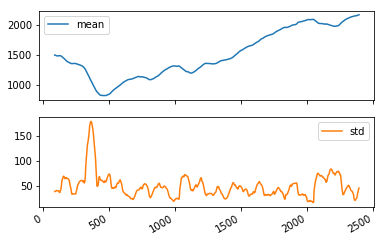

In [34]:
#Multiple rolling metrics
r=data_sp500.SP500.rolling(90).agg(['mean', 'std'])
r.plot(subplots=True)

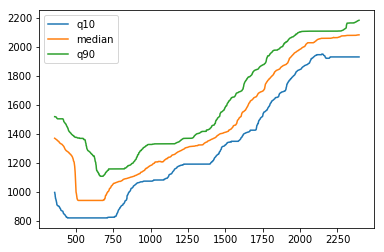

In [38]:
#more multiple rolling metrics
rolling=data_sp500.SP500.rolling(window=360)
q10 = rolling.quantile(.1).to_frame('q10')
median = rolling.median().to_frame('median')
q90=rolling.quantile(.9).to_frame('q90')
pd.concat([q10,median,q90], axis=1).plot()

### Expanding WIndows in pandas
<br>
1. from rolling to expanding windows<br>
2. calculate metrics for periods up to current date<br>
3. new time series reflects all historical values<br>
4. usefull for running date of return, running min/max<br>
5. two options with pandas:<br>
.expanding() just like .rolling<br>
.cumsum(), .cumprod(), .cummin)/max()<br>

In [2]:
import pandas as pd
#basis idea
df=pd.DataFrame({'data': range(5)})
df['expanding_sum'] = df.data.expanding().sum()
df['cumulative_sum']= df.data.cumsum()
df


,data,expanding_sum,cumulative_sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [3]:
import numpy as np
data_sp500=pd.read_csv('SP500.csv', parse_dates=['date_datta'], index_col='date_datta')
data_sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
SP500    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB


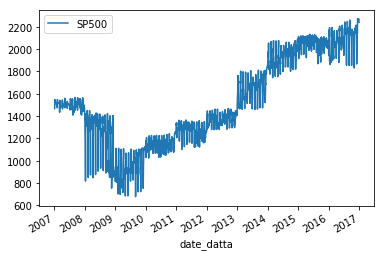

In [5]:

data_sp500.plot()

### How to calculate a running return


moving average (rolling average or running average) <br>


1. single period retun r: current price over last price minus 1 <br>
rt=(pt/pt-1)-1<br>

2. multiperiod return: product of (1+r) for all periods, minus 1:<br>
Rt=(1+r1)(1+r2)....(1+rt)-1<br>

3. for the period return .pct_change()<br>
4. for basic math .add(), sub, mul, div<br>
5. for cumulative product .cumprod(<br>

#### Running Rate of Return in Practice

In [6]:
data_sp500.head(3)

,SP500
date_datta,
2007-06-29,1503.35
2007-02-07,1519.43
2007-03-07,1524.87


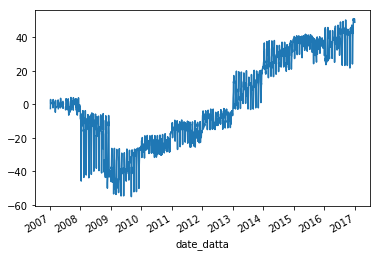

In [7]:
pr=data_sp500.SP500.pct_change()
pr_plus_one=pr.add(1)
cumulative_return=pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

#### Getting the running min and max

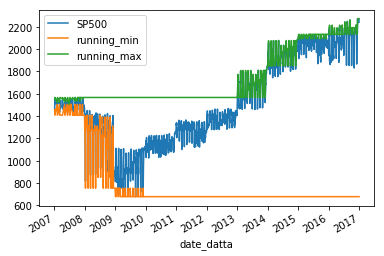

In [8]:
data_sp500['running_min'] = data_sp500.SP500.expanding().min()
data_sp500["running_max"] = data_sp500.SP500.expanding().max()
data_sp500.plot()

#### Rolling annual rate of return

In [11]:
data_sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 3 columns):
SP500          2395 non-null float64
running_min    2395 non-null float64
running_max    2395 non-null float64
dtypes: float64(3)
memory usage: 74.8 KB


In [15]:
data_sp500a=pd.read_csv('SP500.csv', parse_dates=True, index_col='date_datta')
data_sp500a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
SP500    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB


C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002286E74D4E0>,
      dtype=object)

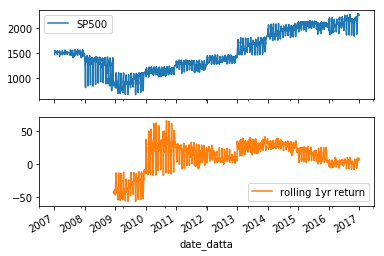

In [20]:
def multi_period_return(period_returns):
    #Return the product of array elements over a given axis.
    return np.prod(period_returns + 1) - 1

#data_sp500.set_index(['date_datta'], inplace = True)
pr = data_sp500a.SP500.pct_change()  #period return

r = pr.rolling(360).apply(multi_period_return)
data_sp500a['rolling 1yr return']=r.mul(100)
data_sp500a.plot(subplots=True)

## Case Study
## S&P500 Price Simulation

daily stock returns are hard to predicts, models often assume they are random in nature
numpy allows you to generate random numbers
from random returns to prices use .cumprod()

2 examples: generate random returns, randomy selected actual sp500 returns

C:\Users\dave_\Anaconda3_2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


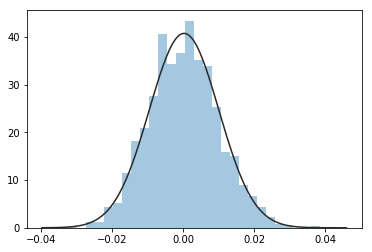

In [25]:
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns

seed(42)
random_return=normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_return, fit=norm, kde=False)

#### create a random price path

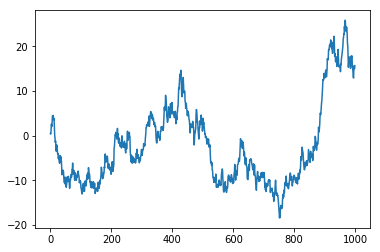

In [26]:
return_series = pd.Series(random_return)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002286F5D2CF8>,
      dtype=object)

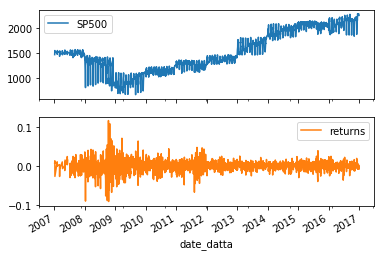

In [27]:
data_sp500=pd.read_csv('SP500.csv', parse_dates=['date_datta'], index_col='date_datta')
data_sp500['returns'] = data_sp500.pct_change()
data_sp500.plot(subplots=True)

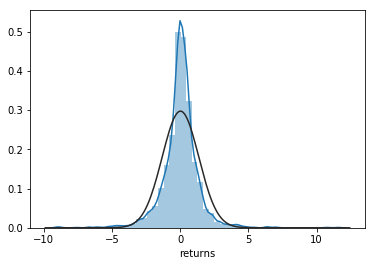

In [28]:
### retrun distribution
sns.distplot(data_sp500.returns.dropna().mul(100), fit=norm)

In [29]:
### Generate random s&p 500 Returns
from numpy.random import choice
sample=data_sp500.returns.dropna()
n_obs=data_sp500.returns.count()
random_walk=choice(sample, size=n_obs)
random_walk=pd.Series(random_walk, index=sample.index)
random_walk.head()

date_datta
2007-02-07    0.005007
2007-03-07    0.040729
2007-05-07   -0.000322
2007-06-07   -0.008404
2007-09-07    0.002119
dtype: float64

### Relatioships between  Time Series: Correlation

correlation: measures linear relatioships
financial markets: important for prediction and risk management
pandas and seaborn have tools to compute and visualize

In [18]:
### Importing five price time series
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

#data=pd.read_csv('assets.csv', parse_dates=['Date'], index_col='Date')
data=pd.read_csv('assets2.csv', parse_dates=['date_datta'], index_col='date_datta')
#data=data.dropna().info()

In [19]:
data.head()

,SP500,AAPL,AMZN,IBM,WMT,XOM
date_datta,,,,,,
2007-06-29,1503.35,1.57,15.27,106.50,47.34,43.40
2007-02-07,1519.43,1.62,15.81,104.72,48.25,43.36
2007-03-07,1524.87,1.51,15.61,101.96,47.50,42.88
2007-05-07,1525.40,1.61,15.34,103.85,48.85,42.48
2007-06-07,1530.44,1.74,16.49,107.25,51.85,42.72


In [22]:
#visualize pairwise linear relationships
import seaborn as sns
daily_returns.SP500 = data.SP500.pct_change()
#sns.jointplot(x='AAPL', y='AMZN', data=data_returns);
daily_returns.head(3)

,SP500,AAPL,AMZN,IBM,WMT,XOM
date_datta,,,,,,
2007-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-07,0.010696,0.031847,0.035363,-0.016714,0.019223,-0.000922
2007-03-07,0.003580,-0.067901,-0.012650,-0.026356,-0.015544,-0.011070


C:\Users\dave_\Anaconda3_2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


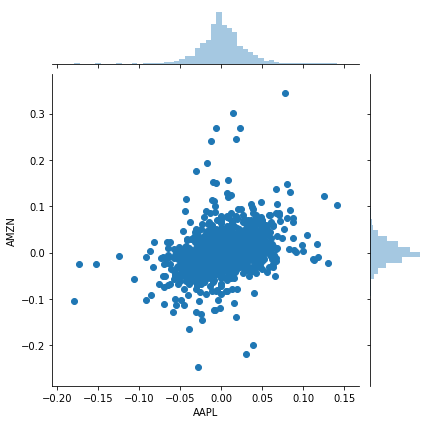

In [23]:
sns.jointplot(x='AAPL', y='AMZN', data=daily_returns);

### calculate correlations

In [24]:
correlations=daily_returns.corr()
correlations.head(3)

,SP500,AAPL,AMZN,IBM,WMT,XOM
SP500,1.000000,-0.019358,0.020460,0.002714,0.013147,-0.006284
AAPL,-0.019358,1.000000,0.367143,0.463518,0.327379,0.362041
AMZN,0.020460,0.367143,1.000000,0.357606,0.287475,0.278736


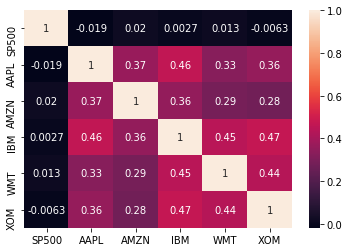

In [25]:
#visualize correlations as a heatmap
sns.heatmap(correlations, annot=True)

### Select Index Component and Import data

#### Market value-weighted index
composite performace of varios stocks
components weighted by market capitalization
share price X Number of shares => market value
larger components get higher percentage weightings
key market indexes are value-weighted
SP500, NASDAQ, Wilshire 5000, Hang Seng

#### Build a Cap-Weighted Index
Apply new skills to construct value-weighted index
select components frome exchange listing data
get component number of shares and stock prices
calculate component weights
calculate index
evaluate performance of components and index

### load stock listing data


In [73]:
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


In [74]:
nyse.head(3)

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,"1,647,165,275.84",nan,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,"112,736,642,168.15",nan,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,"579,312,875.72","2,013.00",Consumer Services,Services-Misc. Amusement & Recreation


In [75]:
#load and prepare listing data
nyse.set_index('Stock Symbol', inplace=True)
nyse.dropna(subset=['Sector'], inplace=True)
nyse['Market Capitalization'] /= 1e6 # in million USD
nyse.head(3)

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,"1,647.17",nan,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,"112,736.64",nan,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,579.31,"2,013.00",Consumer Services,Services-Misc. Amusement & Recreation


In [76]:
nyse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, DDD to ZTO
Data columns (total 6 columns):
Company Name             2177 non-null object
Last Sale                2175 non-null float64
Market Capitalization    2177 non-null float64
IPO Year                 967 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(3)
memory usage: 119.1+ KB


In [77]:
#select index components
components = nyse.groupby(['Sector'])['Market Capitalization'].nlargest(1)
components.sort_values(ascending = False)

Sector                 Stock Symbol
Health Care            JNJ            338,834.39
Energy                 XOM            338,728.71
Finance                JPM            300,283.25
Miscellaneous          BABA           275,525.00
Public Utilities       T              247,339.52
Basic Industries       PG             230,159.64
Consumer Services      WMT            221,864.61
Consumer Non-Durables  KO             183,655.31
Technology             ORCL           181,046.10
Capital Goods          TM             155,660.25
Transportation         UPS             90,180.89
Consumer Durables      ABB             48,398.94
Name: Market Capitalization, dtype: float64

In [78]:
components.head(3)

Sector             Stock Symbol
Basic Industries   PG             230,159.64
Capital Goods      TM             155,660.25
Consumer Durables  ABB             48,398.94
Name: Market Capitalization, dtype: float64

In [79]:
#
tickers = components.index.get_level_values('Stock Symbol')
tickers

Index(['PG', 'TM', 'ABB', 'KO', 'WMT', 'XOM', 'JPM', 'JNJ', 'BABA', 'T',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')

In [80]:
tickers.tolist()

['PG',
 'TM',
 'ABB',
 'KO',
 'WMT',
 'XOM',
 'JPM',
 'JNJ',
 'BABA',
 'T',
 'ORCL',
 'UPS']

In [81]:
nyse.head(3)

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,"1,647.17",nan,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,"112,736.64",nan,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,579.31,"2,013.00",Consumer Services,Services-Misc. Amusement & Recreation


In [82]:
#stock index components
columns=['Company Name', 'Market Capitalization', 'Last Sale']
component=nyse.loc[tickers, columns]
pd.options.display.float_format = '{:,.2f}'.format
component.head(3)

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
PG,Procter & Gamble Company (The),"230,159.64",90.03
TM,Toyota Motor Corp Ltd Ord,"155,660.25",104.18
ABB,ABB Ltd,"48,398.94",22.63


In [83]:
#read with tickers
data = pd.read_csv('stock_4.csv', parse_dates=['Date'], index_col='Date').loc[:, tickers.tolist()]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-04-01 to 2016-12-30
Data columns (total 12 columns):
PG      0 non-null float64
TM      0 non-null float64
ABB     0 non-null float64
KO      0 non-null float64
WMT     0 non-null float64
XOM     0 non-null float64
JPM     0 non-null float64
JNJ     0 non-null float64
BABA    0 non-null float64
T       0 non-null float64
ORCL    0 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB


### Build a market-cap weighted index

key inputs: number of shares and stock price series -> aggregate market value per period

normalize index to start at 100


In [84]:
component


,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
PG,Procter & Gamble Company (The),"230,159.64",90.03
TM,Toyota Motor Corp Ltd Ord,"155,660.25",104.18
ABB,ABB Ltd,"48,398.94",22.63
KO,Coca-Cola Company (The),"183,655.31",42.79
WMT,"Wal-Mart Stores, Inc.","221,864.61",73.15
XOM,Exxon Mobil Corporation,"338,728.71",81.69
JPM,J P Morgan Chase & Co,"300,283.25",84.40
JNJ,Johnson & Johnson,"338,834.39",124.99
BABA,Alibaba Group Holding Limited,"275,525.00",110.21


### Market Capitalization = Number of Shares X Share Price

In [86]:
###
shares=component['Market Capitalization'].div(component['Last Sale'])


shares

Stock Symbol
PG     2,556.48
TM     1,494.15
ABB    2,138.71
KO     4,292.01
WMT    3,033.01
XOM    4,146.51
JPM    3,557.86
JNJ    2,710.89
BABA   2,500.00
T      6,140.50
ORCL   4,114.68
UPS      869.30
dtype: float64

### Save to XLS to a single worksheet

In [ ]:
correlations.to_excel(excel_writer = 'correlations.xls',
                     sheet_name='correlations',
                     startrow=1,
                     startcol=1)

### Saving to multipe Exce worksheets


In [ ]:
data.index=data.idex.date #keep only date component
with pd.ExcelWriter('stock_data.xlsx') as writer:
    corr.to_excel(excel_writer=writer, sheet_name='correlations')
    data.to_excel(excel_writer, sheet_name='prices')
    data.pct_change().to_excel(writer, sheet_name='returns')